<h1 align="center">Volume 4: Spectral 1.</h1>

    Spencer Halverson
    Section 002
    MATH 439

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import barycentric_interpolate
from numpy import linalg as la
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib inline

# Setup

In [2]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

# Problem 1

Use the differentiation matrix to numerically approximate the derivative of u(x)) on a grid of N Chebychev points where N = 6, 8, and 10.
Then use barycentric interpolation (scipy.interpolate.barycentric_interpolate) to
approximate u0 on a grid of 100 evenly spaced points.
Graphically compare your approximation to the exact derivative

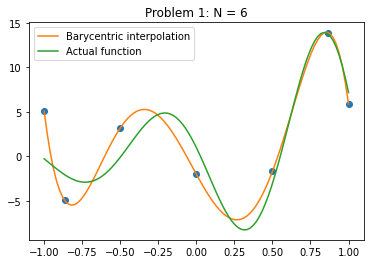

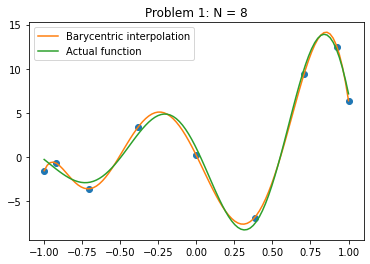

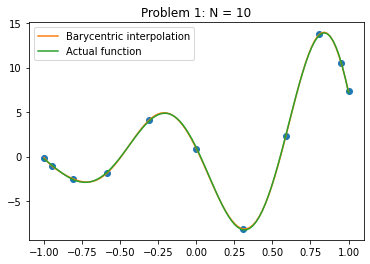

In [3]:
# set u(x)
u = np.vectorize(lambda x: (np.e**x)*np.cos(6*x))
du = np.vectorize(lambda x: (np.e**x)*(np.cos(6*x)-6*np.sin(6*x)))

pts = np.linspace(-1, 1, 100)
# approximate derivative
for N in [6,8,10]:
    D, x = cheb(N)
    U = u(x)
    y = D@U
    approx = barycentric_interpolate(x, y, pts)
    plt.plot(x, y, 'o')
    plt.plot(pts, approx, label="Barycentric interpolation")
    plt.plot(pts, du(pts), label="Actual function")
    plt.legend(loc='best')
    plt.title("Problem 1: N = {}".format(N))
    plt.show()



    


# Problem 2

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points. Compare your numerical solution with the exact solution.

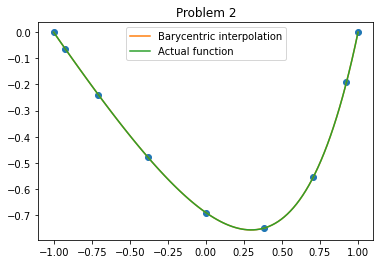

In [4]:
N = 8
f = np.vectorize(lambda x: np.exp(2*x))
true_u = np.vectorize(lambda x: (-np.cosh(2)-np.sinh(2)*x + np.exp(2*x))/(4))

#The following code will force U[0] = U[N] = 0
D, x = cheb(N) #for some N
F = f(x)
D2 = np.dot(D, D)
D2[0,:], D2[-1,:] = 0, 0
D2[0,0], D2[-1,-1] = 1, 1
F[0], F[-1] = 0, 0

# solve for U at Chebyshev points
U = np.linalg.solve(D2, F)

# approximate U and plot
pts = np.linspace(-1, 1, 100)
approx = barycentric_interpolate(x, U, pts)
plt.plot(x, U, 'o')
plt.plot(pts, approx, label="Barycentric interpolation")
plt.plot(pts, true_u(pts), label="Actual function")
plt.legend(loc='best')
plt.title("Problem 2")
plt.show()



# Problem 3

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points.

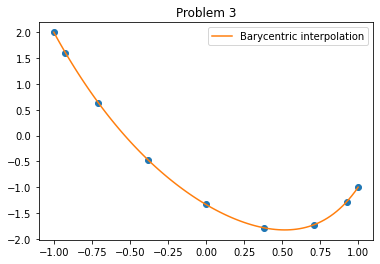

In [5]:
N = 8
f = np.vectorize(lambda x: np.exp(3*x))

#The following code will force U[0] = U[N] = 0
D, x = cheb(N) #for some N
F = f(x)
D2 = np.dot(D, D)
D2[0,:], D2[-1,:] = 0,0
D2[0,0], D2[-1,-1] = 1,1
D[0,:], D[-1,:] = 0, 0
D[0,0], D[-1,-1] = 0,0
F[0], F[-1] = -1, 2

# solve for U at Chebyshev points
U = np.linalg.solve(D2 + D, F)

# approximate U and plot
pts = np.linspace(-1, 1, 100)
approx = barycentric_interpolate(x, U, pts)
plt.plot(x, U, 'o')
plt.plot(pts, approx, label="Barycentric interpolation")
plt.legend(loc='best')
plt.title("Problem 3")
plt.show()

# Problem 4

Use the pseudospectral method to solve the boundary value problem
for several values of λ: λ = 4, 8, 12. Begin by transforming this BVP onto the domain −1 <
x < 1. Use N = 20 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points

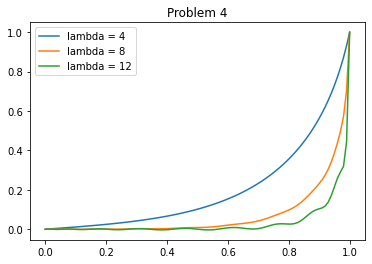

In [6]:
# do linear change in variables:
# set y = x/2 + 1/2
# so if x in [-1, 1] then y in [0, 1]
# now u" = lam / 4 * sinh(lam(u))

for lam in [4,8,12]:
    N = 20
    D, x = cheb(N) #for some N
    D2 = np.dot(D, D)

    def F(U):
        #Set up the equation you want the root of
        out = D2@U - lam/4 * np.sinh(lam*U)

        #Make sure to set the boundaries correctl
        out[0] = U[0] - 1
        out[-1] = U[-1] 

        return out #Newtons Method will update U until the output is all 0's.
    
    #Make your guess, same size as the cheb(N) output
    guess = np.ones_like(x)
    solution = root(F, guess).x

    # transform back to [0, 1] space
    y = 0.5*x + 0.5
    

    # approximate U and plot
    pts = np.linspace(0, 1, 100)
    approx = barycentric_interpolate(y, solution, pts)
    # plt.plot(y, solution, 'o')
    plt.plot(pts, approx, label="lambda = {}".format(lam))
plt.legend(loc='best')
plt.title("Problem 4")
plt.show()

# Problem 5

Find the function y(x) that satisies y(−1) = 1, y(1) = 7, and whose surface of
revolution (about the x-axis) minimizes surface area. Compute the surface area, and plot the
surface. Use N = 50 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points.
Below is sample code for creating the 3D wireframe figure.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


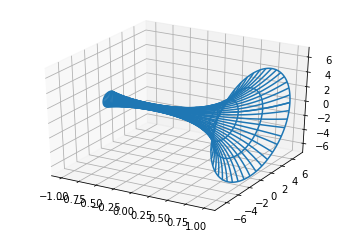

Surface Area: 156.818


In [8]:
# Find Chebyshev points and differential matrix
N = 50
D, x = cheb(N) #for some N
D2 = np.dot(D, D)

def F(U):
    #Set up the equation you want the root of
    out = U*(D2@U) - (D@U)*(D@U) - np.ones_like(U)

    #Make sure to set the boundaries correctl
    out[0] = U[0] - 7
    out[-1] = U[-1] - 1

    return out #Newtons Method will update U until the output is all 0's.

#Make your guess, same size as the cheb(N) output
guess = np.ones_like(x)
solution = root(F, guess).x

# # Calculate surface area
# y_prime = D@solution
# integrand = 2*np.pi*solution*np.sqrt(1+(y_prime)**2)
# val = integrate.simpson(integrand, x)
## Note that this code should work but Scipy imports are being finnicky
## so I computed outside of Python
val = 156.818

# Plot
pts = np.linspace(-1, 1, 100)
barycentric = barycentric_interpolate(x, solution, pts) 
#  ^^ This is the output of barycentric_interpolate() on 100 points

lin = np.linspace(-1, 1, 100)
theta = np.linspace(0,2*np.pi,401)
X, T = np.meshgrid(lin, theta)
Y, Z = barycentric*np.cos(T), barycentric*np.sin(T)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()


print("Surface Area:", val)